# IS362 - Week 12 Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()

<Figure size 432x288 with 0 Axes>

In [2]:
def pois_code(cell):
    if cell == 'p':
        return 0
    elif cell == 'e':
        return 1
    else:
        return 99

In [3]:
def cap_shape_code(cell):
    if cell == 'b':
        return 0
    elif cell =='c':
        return 1
    elif cell =='x':
        return 2
    elif cell =='f':
        return 3
    elif cell =='k':
        return 4
    elif cell =='s':
        return 5
    else:
        return 99

In [4]:
def odor_code(cell):
    if cell == 'a':
        return 0
    elif cell =='l':
        return 1
    elif cell =='c':
        return 2
    elif cell =='y':
        return 3
    elif cell =='f':
        return 4
    elif cell =='m':
        return 5
    elif cell =='n':
        return 6
    elif cell =='p':
        return 7
    elif cell =='s':
        return 8
    else:
        return 99

In [5]:
tup1 = ('poisonous','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment',
        'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
        'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type',
        'veil-color','ring-number','ring-type','spore-print-color','population','habitat')
mdata = pd.read_csv('agaricus-lepiota.data',names=tup1,converters={'poisonous': pois_code,'cap-shape':cap_shape_code,'odor':odor_code})
mdata = mdata.fillna(value=99)


In [6]:
#Look at entry above and below, maybe it will work. Trying to cheese convert all values 
# and then Pearsons Correlation
def num_str_coding(convertee):
    newdict= {}
    for x in range (len(convertee.unique())):
        newdict[x] = convertee.unique()[x]
    return newdict

In [7]:
num_str_coding(mdata['cap-surface'])

{0: 's', 1: 'y', 2: 'f', 3: 'g'}

<AxesSubplot:xlabel='odor', ylabel='poisonous'>

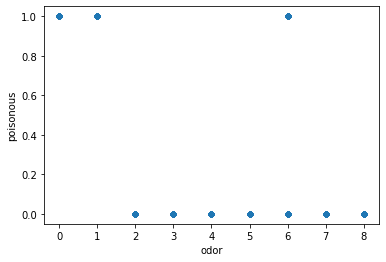

In [8]:
mdata.plot.scatter('odor','poisonous')

<AxesSubplot:xlabel='cap-shape', ylabel='poisonous'>

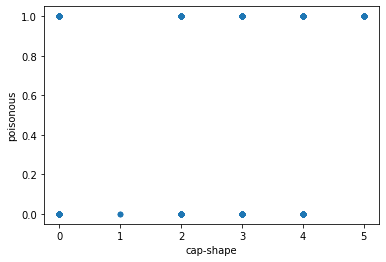

In [9]:
mdata.plot.scatter('cap-shape','poisonous')

In [10]:
def data_preprocess(input_data=pd.DataFrame,category=str(),rndict=dict()):
    f1, f2 = input_data.poisonous==0,input_data.poisonous==1
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    a = [input_data[f1][category].value_counts(normalize=True),
    input_data[f2][category].value_counts(normalize=True)]
    a[0].rename(rndict).plot(kind='bar',ax=axes[0]); axes[0].set_title('Edible')
    a[1].rename(rndict).plot(kind='bar',ax=axes[1]); axes[1].set_title('Poisonous')

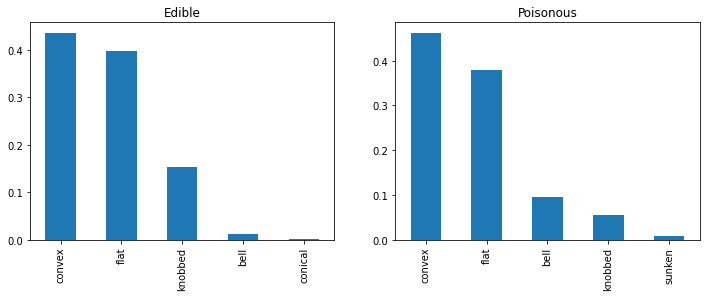

In [11]:
cap_shape_dict={0:'bell',1:'conical',2:'convex',3:'flat',0:'bell',4:'knobbed',5:'sunken'}
data_preprocess(mdata,'cap-shape',cap_shape_dict)

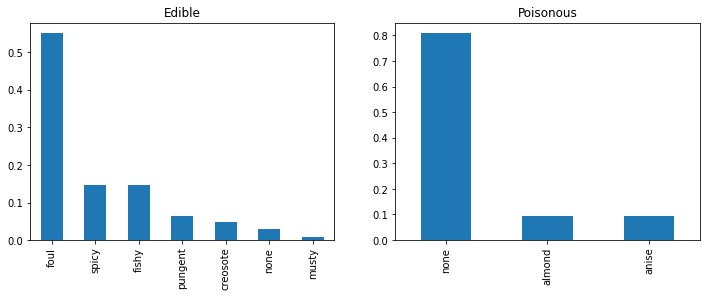

In [12]:
data_preprocess(mdata,'odor',{0:'almond',1:'anise',2:'creosote',3:'fishy',4:'foul',5:'musty',6:'none',7:'pungent',8:'spicy'})

## Odor is a much better indicator for edible vs dangerous mushrooms.

### Below is for the next part.

___

In [ ]:
wholemdata = pd.read_csv('agaricus-lepiota.data',names=tup1)
wholemdata

In [14]:
def num_str_coding(df=pd.DataFrame):
    dwhole = {}
    for col in df:
        dsub= {}
        for x in range (len(df[col].unique())):
                dsub[df[col].unique()[x]] = x
        dwhole[col]=dsub
    return dwhole
dwhole = num_str_coding(mdata)
mdata
dwhole
dwhole['poisonous'].keys()

dict_keys([0, 1])

In [15]:
def func(x,keyword='bar'):
    return (x,keyword)

func = lambda x,keyword='bar':(x,keyword)

func = lambda cell :dwhole[tup1['poisonous']][cell]

tup1 = ('poisonous','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment',
        'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
        'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type',
        'veil-color','ring-number','ring-type','spore-print-color','population','habitat')
mdata = pd.read_csv('agaricus-lepiota.data',names=tup1,converters={'poisonous': lambda cell :dwhole[tup1['poisonous']][cell]})
#mdata = mdata.fillna(value=99)

TypeError: tuple indices must be integers or slices, not str